In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from liftnet import LIFTNetRegressor, LIFTNetClassifier
from liftnet import GLMTreeRegressor, GLMTreeClassifier

## Regression Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
train_x, test_x, train_y, test_y = train_test_split(cal_housing.data, cal_housing.target, test_size=0.2, random_state=0)

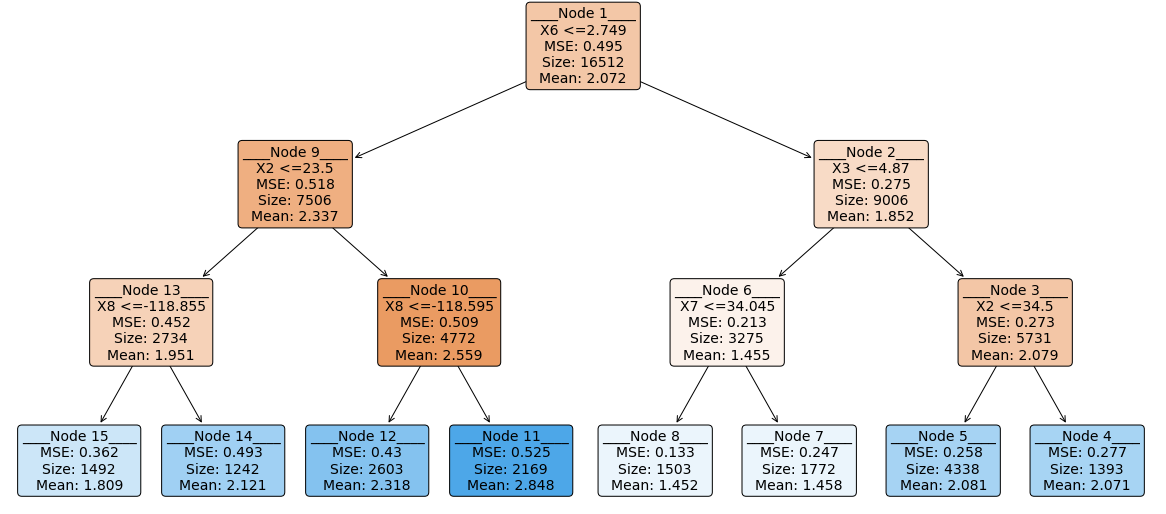

(0.5799285272052428, 0.5828929166134631)

In [3]:
clf = LIFTNetRegressor(max_depth=3, min_samples_leaf=100, knot_num=5, n_feature_search=5, min_impurity_decrease=0,
                       n_split_grid=10, reg_lambda=[0.001, 0.01, 0.1], reg_gamma=[1e-3, 1e-6, 1e-9])
clf.fit(train_x, train_y)
clf.plot_tree()
pred_train = clf.predict(train_x).reshape([-1, 1])
pred_test = clf.predict(test_x).reshape([-1, 1])
np.mean((train_y - pred_train.ravel()) ** 2) ** 0.5, np.mean((test_y - pred_test.ravel()) ** 2) ** 0.5

In [4]:
clf = GLMTreeRegressor(max_depth=3, min_samples_leaf=100, min_impurity_decrease=0, n_split_grid=10)
clf.fit(train_x, train_y)
pred_train = clf.predict(train_x).reshape([-1, 1])
pred_test = clf.predict(test_x).reshape([-1, 1])
np.mean((train_y - pred_train.ravel()) ** 2) ** 0.5, np.mean((test_y - pred_test.ravel()) ** 2) ** 0.5

(0.6368800716023545, 0.6453127365045248)

## Classification Dataset

In [5]:
from sklearn.datasets import fetch_openml
magic = fetch_openml("MagicTelescope")
train_x, test_x, train_y, test_y = train_test_split(magic.data, magic.target, test_size=0.2, random_state=0)

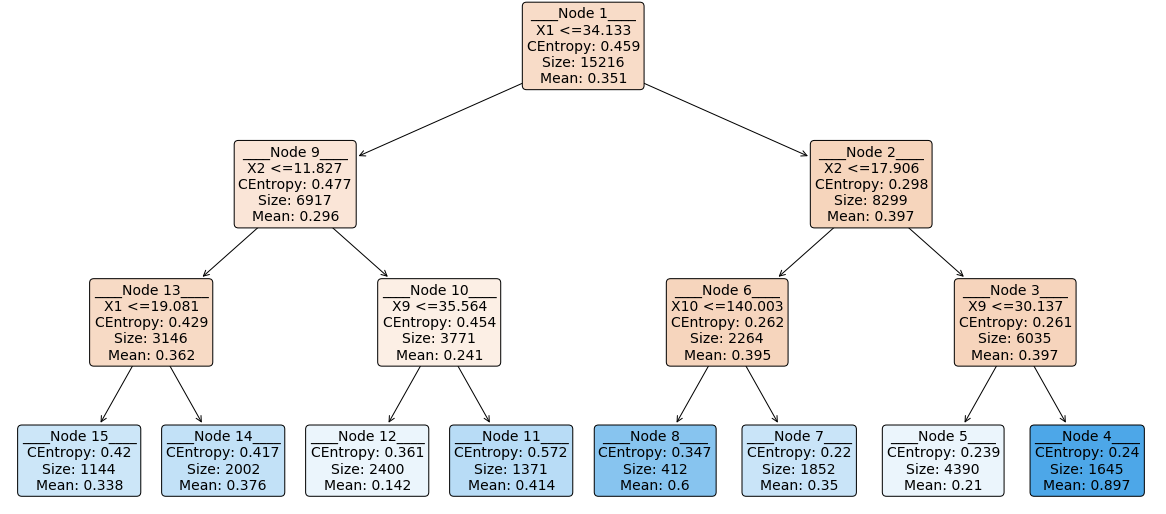

(0.9186767186726044, 0.9131102475571667)

In [6]:
clf = LIFTNetClassifier(max_depth=3, min_samples_leaf=100, knot_num=5, n_feature_search=5, min_impurity_decrease=0,
                        n_split_grid=10, reg_lambda=[0.001, 0.01, 0.1],
                        reg_gamma=[1e-3, 1e-6, 1e-9])
clf.fit(train_x, train_y)
clf.plot_tree()
pred_train = clf.predict_proba(train_x)[:, 1]
pred_test = clf.predict_proba(test_x)[:, 1]
roc_auc_score(train_y, pred_train.ravel()), roc_auc_score(test_y, pred_test.ravel())

In [7]:
clf = GLMTreeClassifier(max_depth=3, min_samples_leaf=100, min_impurity_decrease=0, n_split_grid=10)
clf.fit(train_x, train_y)
pred_train = clf.predict_proba(train_x)[:, 1]
pred_test = clf.predict_proba(test_x)[:, 1]
roc_auc_score(train_y, pred_train.ravel()), roc_auc_score(test_y, pred_test.ravel())

(0.9200529555220067, 0.9138014230813043)